In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Define color schemes and orders

In [5]:
tech_goodOrder = [
    "CCS",
    "BECCS",
    "DAC(CS)",
    "CCUS",
    "Soil Carbon Sequestration",
    "AR",
    "restoration of landscapes/peats",
    "Agroforestry",
    "Forest Management",
    "Biochar",
    "Enhanced Weathering (land based)",
    "Ocean alkalinity enhancement",
    "Blue Carbon",
    "Algae farming",
    "Ocean fertilization & Artificial upwelling",
    "General Literature on CDR/NET",
    
]

exclude_technologies = ["CCS", "CCUS", "Algae farming","Other technologies",]

tech_goodOrder = [t for t in tech_goodOrder if t not in exclude_technologies]

col_ccs = [
'#e6550d',
'#fdae6b'
] # '#fc8d59','#d7301f']# oranges
col_ccs.reverse() 
col_biochar =  ['#f768a1'] # violet
col_landbased = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c'] # greens
col_landbased.reverse() 
col_ew_landbased =  ['#c994c7'] # bright violet
col_ocean = ['#f1eef6','#bdc9e1','#74a9cf'] #,'#0570b0'] # blues
col_gen_other = ['#636363', '#bdbdbd'] # greys

color_tech = (
             col_ccs + 
             col_landbased +  
             col_biochar + 
             col_ew_landbased + 
             col_ocean +
             col_gen_other
)

tc = {}
for i, tech in enumerate(tech_goodOrder):
    tc[tech]=color_tech[i]

In [19]:
exp = ['experimental - field /fieldstudy',
 'experimental - laboratory']
modelling = ['modelling','data analysis / statistical analysis / econometrics','Life Cycle Assessments']
qualit = ['review','systematic reviews','survey','qualitative research']
unknown = ['Unknown Method']

col_exp = ['#1c9099','#a6bddb'] # green-blue
col_model = ['#fdbe85','#fd8d3c','#d94701'] # oranges
col_qual = ['#feebe2','#fbb4b9','#f768a1','#ae017e'] # pinks
col_unk = ['#cccccc']

col_meths = col_exp + col_model + col_qual + col_unk
meth_goodOrder = exp + modelling + qualit + unknown

mc = {}
for idx, m in enumerate(meth_goodOrder):
    mc[m] = col_meths[idx]

In [5]:
mc

{'experimental - field /fieldstudy': '#a6bddb',
 'experimental - laboratory': '#1c9099',
 'modelling': '#fdbe85',
 'data analysis / statistical analysis / econometrics': '#fd8d3c',
 'Life Cycle Assessments': '#d94701',
 'review': '#feebe2',
 'systematic reviews': '#fbb4b9',
 'survey': '#f768a1',
 'qualitative research': '#ae017e',
 'Unknown Method': '#cccccc'}

In [7]:
context_all = ['earth system',
 'equity & ethics',
 'policy/government',
 'public perception',
 'socio-economic pathways',
 'technology']
context_cols = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
context_cols.reverse()
cc = {}
for idx, c in enumerate(context_all):
    cc[c] = context_cols[idx]

In [5]:
cc

{'earth system': '#e31a1c',
 'equity & ethics': '#fb9a99',
 'policy/government': '#33a02c',
 'public perception': '#b2df8a',
 'socio-economic pathways': '#1f78b4',
 'technology': '#a6cee3'}

In [20]:
meth_dict = {
 'data analysis / statistical analysis / econometrics' : 'Data Analysis / Statistical Analysis / Econometrics',
 'experimental - field /fieldstudy': 'Experimental - Field Study',
 'experimental - laboratory': 'Experimental - Laboratory',
 'modelling': 'Modelling',
 'qualitative research': 'Qualitative Research',
 'review': 'Review',
 'survey': 'Survey',
 'systematic reviews': 'Systematic Review',
 'Unknown Method': 'Unknown Method',
 'Life Cycle Assessments': 'Life Cycle Assessment'
    
}
context_dict = {
 'earth system': 'Earth System',
 'equity & ethics':'Equity & Ethics',
 'policy/government': 'Policy / Government',
 'public perception': 'Public Perception',
 'socio-economic pathways': 'Socio-Economic Pathways',
 'technology': 'Technology'
}
tech_labs = ['BECCS',
 'DAC(CS)',
 'Soil Carbon Sequestration',
 'Afforestation/Reforestration',
 'Restoration of Landscapes/Peats',
 'Agroforestry',
 'Forest Management',
 'Biochar',
 'Enhanced Weathering',
 'Ocean Alkalinity Enhancement',
 'Blue Carbon',
 'Ocean Fertilization & Artificial Upwelling',
 'General Literature on CDR']

### Load Data

In [21]:
def convert_to_list(string):
    try:
        return literal_eval(string)
    except:
        return np.nan


ipcc = pd.read_csv("data/ipcc_paper_with_predictions.csv", converters={"all_pred_tech": literal_eval})
ipcc["all_pred_context"] = ipcc.all_pred_context.apply(convert_to_list)
ipcc["all_pred_meth"] = ipcc.all_pred_meth.apply(convert_to_list)



techs = pd.read_csv("data/allIds__allTech_in_pub_from_run_2023-06-18.csv")
ids = techs.drop_duplicates(subset="id")
meths = pd.read_csv("data/2023-06-18_meth_predicted_unbalanced_hyperparamTuning.csv", converters={"all_pred_meth": literal_eval})
meths = ids.merge(meths[["id", "all_pred_meth"]], how="left", on="id")
meth_ex = meths.explode("all_pred_meth")
meth_ex = meth_ex[meth_ex.all_pred_meth!='statistical analysis / econometrics']

context = pd.read_csv("data/2023-06-18_context_predicted_unbalanced_hyperparamTuning.csv", converters={"all_pred_context": literal_eval})
context = ids.merge(context[["id", "all_pred_context"]], how="left", on="id")

ipcc_numPaper = ipcc.id.nunique()
all_numPaper = len(ids)

In [22]:
ipcc_tech = ipcc.explode("all_pred_tech").groupby('all_pred_tech', as_index=False).size()
ipcc_tech["col"] = ipcc_tech["all_pred_tech"].replace(tc)
ipcc_tech.index = ipcc_tech["all_pred_tech"]
ipcc_tech = ipcc_tech.reindex(tech_goodOrder)
tech_ex = techs.groupby('all_pred_tech', as_index=False).size()
tech_ex["col"] = tech_ex["all_pred_tech"].replace(tc)
tech_ex.index = tech_ex.all_pred_tech
tech_ex = tech_ex.reindex(tech_goodOrder)


# add meta-analysis studies
with open("data/ids_metananlysis_in_titeAbstract.txt") as f:
    meta_ids = f.readlines()
    meta_ids = [int(i) for i in meta_ids]


ipcc_meth = ipcc.explode("all_pred_meth")
ipcc_meth.loc[ipcc_meth.all_pred_meth=='statistical analysis / econometrics',"all_pred_meth"] = 'data analysis / statistical analysis / econometrics'
meth_meta = ipcc_meth.loc[ipcc_meth.id.isin(meta_ids)]
meth_meta = meth_meta.drop_duplicates(subset=['id'])
meth_meta["all_pred_meth"] = "systematic reviews"
ipcc_meth = pd.concat([ipcc_meth, meth_meta])

ipcc_meth = ipcc_meth.groupby('all_pred_meth', as_index=False).size()
ipcc_meth["col"] = ipcc_meth.all_pred_meth.replace(mc)


meth_meta = meth_ex.loc[meth_ex.id.isin(meta_ids)]
meth_meta = meth_meta.drop_duplicates(subset=['id'])
meth_meta["all_pred_meth"] = "systematic reviews"
meth_ex = pd.concat([meth_ex, meth_meta])

meth_ex = meth_ex.groupby('all_pred_meth', as_index=False).size()
meth_ex["col"] = meth_ex.all_pred_meth.replace(mc)

ipcc_context = ipcc.explode("all_pred_context").groupby("all_pred_context", as_index=False).size()
ipcc_context["col"] = ipcc_context.all_pred_context.replace(cc)
context_ex = context.explode("all_pred_context").groupby('all_pred_context', as_index=False).size()
context_ex["col"] = context_ex.all_pred_context.replace(cc)

In [41]:
context_ex["size"]/sum(context_ex["size"])

0    0.005755
1    0.001796
2    0.036260
3    0.007651
4    0.087589
5    0.860949
Name: size, dtype: float64

### Tech, Meth, Context

In [23]:
meth_ex.all_pred_meth = meth_ex.all_pred_meth.astype("category")
meth_ex.all_pred_meth = meth_ex.all_pred_meth.cat.set_categories(mc.keys())
meth_ex = meth_ex.sort_values("all_pred_meth")

ipcc_meth.all_pred_meth = ipcc_meth.all_pred_meth.astype("category")
ipcc_meth.all_pred_meth = ipcc_meth.all_pred_meth.cat.set_categories(mc.keys())
ipcc_meth = ipcc_meth.sort_values("all_pred_meth") 

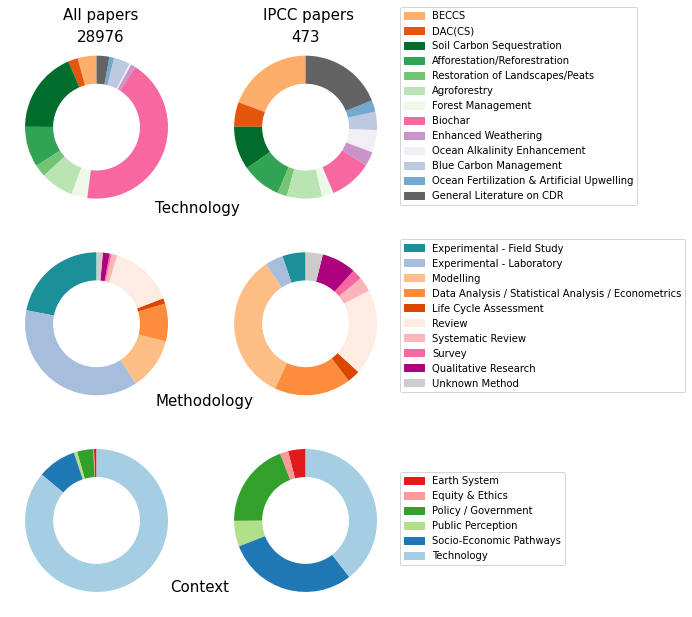

In [24]:
fig, ax = plt.subplots(figsize=(6,8))

#### technologies
ax = plt.subplot2grid((3,2),(0, 0))
plt.tight_layout(pad=0.0, w_pad=0.1, h_pad=.1)
plt.pie(tech_ex["size"], colors=tech_ex["col"], startangle=90)
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax = plt.subplot2grid((3,2),(0, 1))
plt.pie(ipcc_tech["size"], colors=ipcc_tech["col"], startangle=90)
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

legend_labels = []
for tech in tech_goodOrder:
    if tech=="AR":
        lab="Afforestation/Reforestration"
    elif "restoration" in tech:
        lab="Restoration of Landscapes/Peats"
    elif tech=="Blue Carbon":
        lab="Blue Carbon Management"
    elif tech=="General Literature on CDR/NET":
        lab="General Literature on CDR"
    elif "Enhanced " in tech:
        lab="Enhanced Weathering"
    elif "welling" in tech:
        lab="Ocean Fertilization & Artificial Upwelling"
    elif 'alkalinity' in tech:
        lab="Ocean Alkalinity Enhancement"
    else:
        lab=tech
    legend_labels.append(mpatches.Patch(color=tc[tech], label=lab))
ax.legend(handles=legend_labels, bbox_to_anchor=(1., 1.2))

##### methodologies
ax = plt.subplot2grid((3,2),(1, 0))

ax.pie(meth_ex["size"], colors=meth_ex["col"], startangle=90)
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax = plt.subplot2grid((3,2),(1, 1))
ax.pie(ipcc_meth["size"], colors=ipcc_meth["col"], startangle=90)
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

legend_labels = []
for m in meth_goodOrder:
    legend_labels.append(mpatches.Patch(color=mc[m], label=meth_dict[m]))
ax.legend(handles=legend_labels, bbox_to_anchor=(1., 1))


# context
ax = plt.subplot2grid((3,2),(2, 0))
ax.pie(context_ex["size"], colors=context_ex["col"], startangle=90)
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax = plt.subplot2grid((3,2),(2, 1))
ax.pie(ipcc_context["size"], colors=ipcc_context["col"], startangle=90)
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

legend_labels = []
for c in context_all:
    legend_labels.append(mpatches.Patch(color=cc[c], label=context_dict[c]))
ax.legend(handles=legend_labels, bbox_to_anchor=(1., 0.8))

## Text
plt.text(-3.4,7, "All papers",fontsize=15)
plt.text(-3.2,6.7, all_numPaper,fontsize=15)

plt.text(-0.6,7, "IPCC papers",fontsize=15)
plt.text(-0.2,6.7, ipcc_numPaper,fontsize=15)


plt.text(-2.1,4.3, "Technology",fontsize=15)
plt.text(-2.1,1.6, "Methodology",fontsize=15)
plt.text(-1.9,-1, "Context",fontsize=15)


plt.savefig("figures/all_vs_ipcc_tech_meth_context.png", bbox_inches="tight", facecolor='white', edgecolor='none')


In [55]:
ipcc_meth["rel"]=ipcc_meth["size"]/ipcc_meth["size"].sum()

In [56]:
ipcc_meth

,all_pred_meth,size,col,rel
0,Life Cycle Assessments,15,#d94701,0.029183
1,Unknown Method,20,#cccccc,0.038911
2,data analysis / statistical analysis / econome...,89,#fd8d3c,0.173152
3,experimental - field /fieldstudy,27,#a6bddb,0.052529
4,experimental - laboratory,21,#1c9099,0.040856
5,modelling,173,#fdbe85,0.336576
6,qualitative research,40,#ae017e,0.077821
7,review,100,#feebe2,0.194553
8,survey,12,#f768a1,0.023346
9,systematic reviews,17,#fbb4b9,0.033074


In [58]:
meth_ex["rel"]=meth_ex["size"]/meth_ex["size"].sum()
meth_ex

,all_pred_meth,size,col,rel
0,Life Cycle Assessments,412,#d94701,0.012426
1,Unknown Method,468,#cccccc,0.014115
2,data analysis / statistical analysis / econome...,2831,#fd8d3c,0.085382
3,experimental - field /fieldstudy,7282,#a6bddb,0.219622
4,experimental - laboratory,12380,#1c9099,0.373375
5,modelling,3887,#fdbe85,0.117230
6,qualitative research,509,#ae017e,0.015351
7,review,4817,#feebe2,0.145279
8,survey,142,#f768a1,0.004283
9,systematic reviews,429,#fbb4b9,0.012938


### Tech, Context

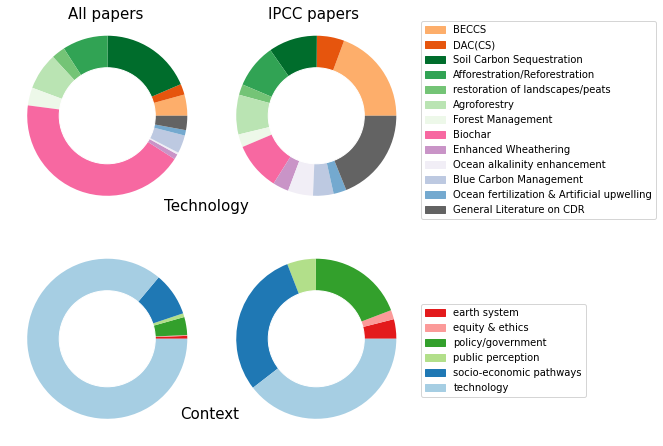

In [10]:
fig, ax = plt.subplots(figsize=(6,6))

#### technologies
ax = plt.subplot2grid((2,2),(0, 0))
plt.tight_layout(pad=0.0, w_pad=0.1, h_pad=.1)
plt.pie(tech_ex["size"], colors=tech_ex["col"])
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax = plt.subplot2grid((2,2),(0, 1))
plt.pie(ipcc_tech["size"], colors=ipcc_tech["col"])
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

legend_labels = []
for tech in tech_goodOrder:
    if tech=="AR":
        lab="Afforestration/Reforestration"
    elif tech=="Blue Carbon":
        lab="Blue Carbon Management"
    elif tech=="General Literature on CDR/NET":
        lab="General Literature on CDR"
    elif "Enhanced " in tech:
        lab="Enhanced Wheathering"
    else:
        lab=tech
    legend_labels.append(mpatches.Patch(color=tc[tech], label=lab))
ax.legend(handles=legend_labels, bbox_to_anchor=(1., 1.))

# context
ax = plt.subplot2grid((2,2),(1, 0))
ax.pie(context_ex["size"], colors=context_ex["col"])
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ax = plt.subplot2grid((2,2),(1, 1))
ax.pie(ipcc_context["size"], colors=ipcc_context["col"])
my_circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

legend_labels = []
for c in context_all:
    legend_labels.append(mpatches.Patch(color=cc[c], label=c))
ax.legend(handles=legend_labels, bbox_to_anchor=(1., 0.7))

## Text
plt.text(-3.1,4, "All papers",fontsize=15)
plt.text(-0.6,4, "IPCC papers",fontsize=15)

plt.text(-1.9,1.6, "Technology",fontsize=15)
plt.text(-1.7,-1, "Context",fontsize=15)

plt.savefig("figures/all_vs_ipcc_tech_context.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### To Excel

In [32]:
ipcc_tech[[ "size"]].rename(columns={"size":"ipcc paper"}).merge(
    tech_ex[[ "size"]].rename(columns={"size":"all paper"}),
    how="left", left_index=True, right_index=True
).to_excel('figures/fig_data/fig_ipcc__technology.xlsx')

In [33]:
ipcc_meth[["all_pred_meth", "size"]].rename(columns={"size":"ipcc paper"}).merge(
    meth_ex[["all_pred_meth", "size"]].rename(columns={"size":"all paper"}),
    how="left", 
    on="all_pred_meth"
).to_excel('figures/fig_data/fig_ipcc__methodology.xlsx', index=False)

In [34]:
ipcc_context[["all_pred_context", "size"]].rename(columns={"size":"ipcc paper"}).merge(
    context_ex[["all_pred_context", "size"]].rename(columns={"size":"all paper"}),
    how="left", 
    on="all_pred_context"
).to_excel('figures/fig_data/fig_ipcc__context.xlsx', index=False)

### Analysis for paper

In [11]:
tech_ex["size"]/all_numPaper

all_pred_tech
BECCS                                         0.055805
DAC(CS)                                       0.028368
Soil Carbon Sequestration                     0.240855
AR                                            0.119685
restoration of landscapes/peats               0.035788
Agroforestry                                  0.097218
Forest Management                             0.047142
Biochar                                       0.560188
Enhanced Weathering (land based)              0.014012
Ocean alkalinity enhancement                  0.005246
Blue Carbon                                   0.047557
Ocean fertilization & Artificial upwelling    0.014150
General Literature on CDR/NET                 0.037686
Name: size, dtype: float64

In [13]:
ipcc_tech["size"]/ipcc_numPaper

all_pred_tech
BECCS                                         0.266385
DAC(CS)                                       0.076110
Soil Carbon Sequestration                     0.135307
AR                                            0.122622
restoration of landscapes/peats               0.029598
Agroforestry                                  0.109937
Forest Management                             0.035941
Biochar                                       0.133192
Enhanced Weathering (land based)              0.044397
Ocean alkalinity enhancement                  0.069767
Blue Carbon                                   0.057082
Ocean fertilization & Artificial upwelling    0.035941
General Literature on CDR/NET                 0.260042
Name: size, dtype: float64

In [17]:
ipcc_numPaper/all_numPaper

0.016323854224185533

In [36]:
ipcc_meth#/ipcc_numPaper

,all_pred_meth,size,col
0,Life Cycle Assessments,15,#d94701
1,Unknown Method,20,#cccccc
2,data analysis / statistical analysis / econome...,89,#fd8d3c
3,experimental - field /fieldstudy,27,#a6bddb
4,experimental - laboratory,21,#1c9099
5,modelling,173,#fdbe85
6,qualitative research,40,#ae017e
7,review,100,#feebe2
8,survey,12,#f768a1
9,systematic reviews,17,#fbb4b9


In [37]:
ipcc_exp = ipcc[['id', 'all_pred_tech',
       'first_pred_tech', 'all_pred_meth', 'first_pred_meth',
       'all_pred_context', 'first_pred_context']]
ipcc_exp = ipcc_exp.dropna(subset=["all_pred_meth"])
ipcc_exp = ipcc_exp.explode("all_pred_meth")
ipcc_exp.loc[ipcc_exp["all_pred_meth"].str.contains("experimental"),"all_pred_meth"] = "experimental"
ipcc_exp.loc[ipcc_exp["all_pred_meth"].str.contains("statistical"),"all_pred_meth"] = "data analysis / statistical analysis / econometrics"

In [38]:
ipcc_exp["all_pred_meth"].value_counts()/ipcc_numPaper

modelling                                              0.365751
review                                                 0.211416
data analysis / statistical analysis / econometrics    0.188161
experimental                                           0.101480
qualitative research                                   0.084567
Unknown Method                                         0.042283
systematic reviews                                     0.031712
Life Cycle Assessments                                 0.031712
survey                                                 0.025370
Name: all_pred_meth, dtype: float64

In [39]:
meth_ex

,all_pred_meth,size,col
0,Life Cycle Assessments,412,#d94701
1,Unknown Method,468,#cccccc
2,data analysis / statistical analysis / econome...,2831,#fd8d3c
3,experimental - field /fieldstudy,7282,#a6bddb
4,experimental - laboratory,12380,#1c9099
5,modelling,3887,#fdbe85
6,qualitative research,509,#ae017e
7,review,4817,#feebe2
8,survey,142,#f768a1
9,systematic reviews,429,#fbb4b9


In [50]:
meths_ex = meths.explode("all_pred_meth")

In [11]:
meth_ex["size"]/all_numPaper

0    0.014219
1    0.016151
2    0.097702
3    0.251311
4    0.427250
5    0.134145
6    0.017566
7    0.166241
8    0.004901
9    0.014805
Name: size, dtype: float64

In [63]:
ipcc_context

,all_pred_context,size,col
0,earth system,21,#e31a1c
1,equity & ethics,10,#fb9a99
2,policy/government,103,#33a02c
3,public perception,31,#b2df8a
4,socio-economic pathways,158,#1f78b4
5,technology,211,#a6cee3


In [64]:
ipcc_context["size"]/ipcc_numPaper

0    0.044397
1    0.021142
2    0.217759
3    0.065539
4    0.334038
5    0.446089
Name: size, dtype: float64

In [12]:
context_ex

,all_pred_context,size,col
0,earth system,173,#e31a1c
1,equity & ethics,54,#fb9a99
2,policy/government,1090,#33a02c
3,public perception,230,#b2df8a
4,socio-economic pathways,2633,#1f78b4
5,technology,25881,#a6cee3


In [13]:
context_ex["size"]/all_numPaper

0    0.005970
1    0.001864
2    0.037617
3    0.007938
4    0.090868
5    0.893187
Name: size, dtype: float64